In [1]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:
#loading the models saved in the previous snippet of the code
model1 = load_model('devanagari.h5')
print(model1)

In [3]:
#making a dictionary of the tags
letter_count = {0: 'CHECK', 1: 'ka', 2: 'kha', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha', 10: 'yna',
                11: 'ta', 12: 'tha', 13: 'da', 14: 'dha', 15: 'adna', 16: 'ta', 17: 'tha', 18: 'da', 19: 'dha', 20: 'na',
                21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'wa', 30: 'sha',
                31: 'shathkon_wala', 32: 'sa', 33: 'ha', 34: 'shhya', 35: 'tra', 36: 'gya', 37: 'CHECK'}

In [4]:
def keras_process_image(img):
    image_x = 32
    image_y = 32
    #resizing the input image just to be sure
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img

def keras_predict(model, image):
    processed = keras_process_image(image)
    #pred_prob is the probable answer of the model in form of 37x1 matrix
    pred_prob = model.predict(processed)[0]
    #finding the index of the class which it has predicted and storing it in pred_class
    pred_class = list(pred_prob).index(max(pred_prob))
    return max(pred_prob), pred_class

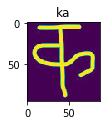

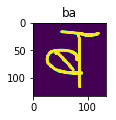

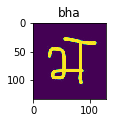

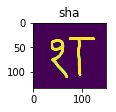

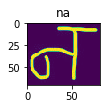

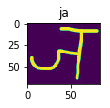

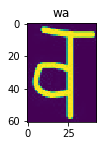

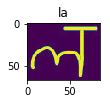

In [28]:
#for loop for the number of photos in the folder
for i in range(8):
    image = cv2.imread(r"folder/character_"+str(i)+".jpg", cv2.IMREAD_GRAYSCALE)
    pred_probab, pred_class = keras_predict(model1, image)
    plt.figure(i+1)
    plt.subplot(241+i)
    plt.imshow(image)
    plt.title(letter_count[pred_class])
    #letter_count[pred_class] is getting the tag from the dictionary and saving the image with its name
    cv2.imwrite(r"folder/predicted/ "+letter_count[pred_class]+".jpg",image)